In [1]:
import numpy as np
import libraries as lib
import matplotlib.pyplot as plt 

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#  I. BOSTON HOUSING DATASET

## 1. Data Preparing

Import the Boston Housing dataset, with default defined predictors and targets.

In [2]:
# housing predictors, housing targets
housing_predic, housing_targ = lib.data_import("HousingData.csv")

Clean the imported dataset including filling the missing values, handling the categorical attributes and normalizing the predictor's values such that they can work well with the regression algorithm. The procedure will result in the preprocessed predictors and the preprocessed targets.

In [3]:
# preprocessed housing predictors, preprocessed housing targets
pre_hou_predic, pre_hou_targ = lib.data_cl(housing_predic,housing_targ)

Data Dimesion Reduction

- Data Visualization

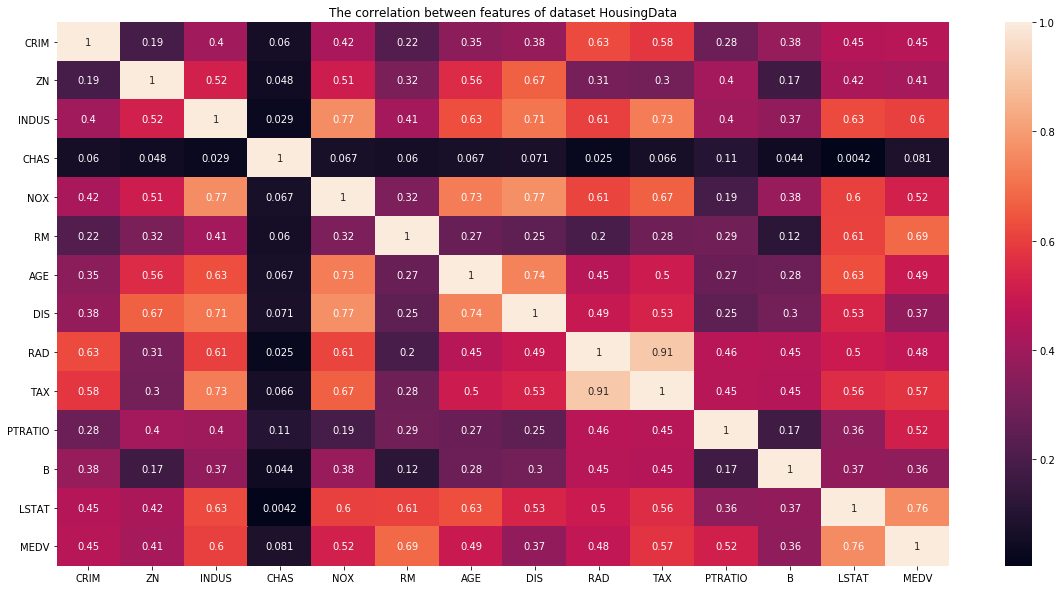

In [4]:
lib.feature_correlation('HousingData.csv')

+ We see that, there are several predictors used in the Boston Housing Dataset. Some of them are very correlated such as (INDUS and DIS), and some predictors are almost not correlated such as (Zn and B). In the conclusion, we have some rebundant informations in Dataset, to reduce this high dimension space to lower one we use the Priciple Component Analysis technique. 

- Dimension Reduction with PCA

- We reduce the dimension by using the PCA to keep 90% variances of the Dataset.

Number of acp components features=  13
cumsum variance explained=  [0.45819647 0.56643339 0.66414341 0.73120956 0.79620963 0.84751852
 0.89044955 0.92348518 0.9461763  0.96492196 0.98154345 0.99469887]
nb_component_features:  7


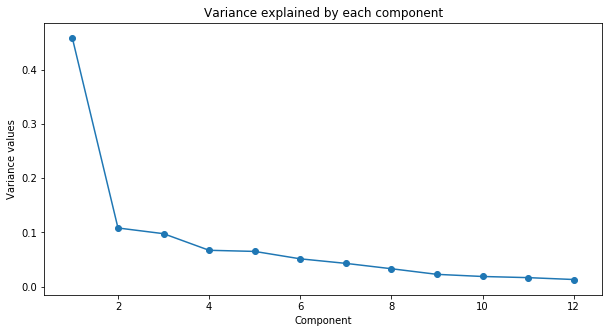

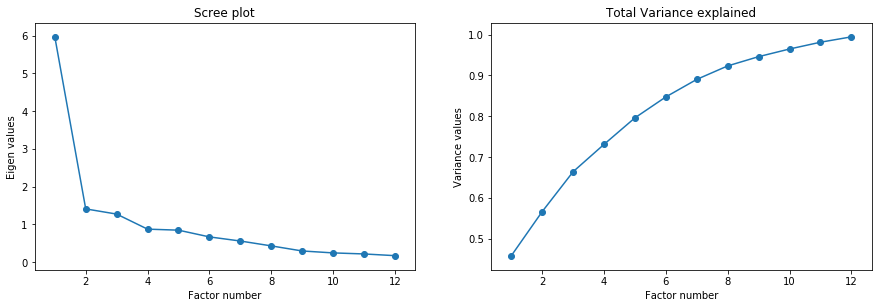

In [5]:
X_new,y = lib.Dimension_Reduction(pre_hou_predic,pre_hou_targ,to_plot = True)

- We figure out that by after doing PCA and keep only 8 dimensions we can obtain 92% variances of data. We reduced the 5 dimension but we can save a significant amount of data

Divide the Boston Housing Data into traing set and test set, and prepare the training set for cross-validation

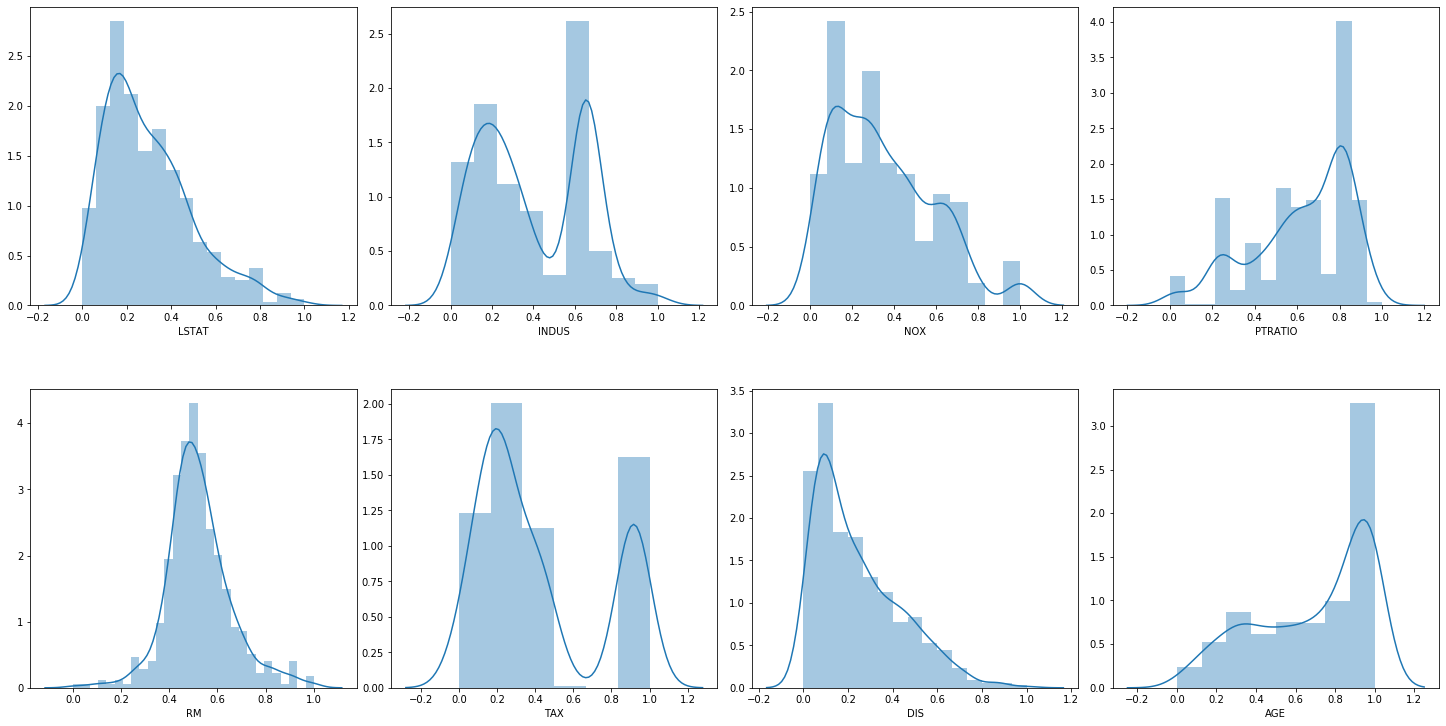

In [6]:
# house train set, house test set, house train cross validation, house test cross validation
#hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val = lib.data_split(X_new,y)
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
lib.dessin_distribution(pre_hou_predic, column_sels, 2, 4)
X = pre_hou_predic.loc[:,column_sels]
y = pre_hou_targ
hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val = lib.data_split(X.values, y.values)

## 2. Regression

### 2.1. Decsion Tree algorithm

We use the Decision Tree algorithm to predict the Housing price in Boston.

In [7]:
# initiate the model
tree = lib.decision_tree()

In [8]:
# feed the data to the model
lib.eval_lr(tree,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.0000
R2 score is: 1.0000
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 4.6994
R2 score is: 0.7040
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross-validation R2 score is 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average RMSE is: 0.0000
Average R2 score is: 1.0000
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.9337, 3.6636, 4.2149, 6.9888, 4.5748, 4.7309, 3.1733, 10.8655, 7.1448, 3.84

#### Conclusion

- The model overfits the training set
- The cross-validation gives a good performance on the training set, but not good at all on the test set.

### 2.2. Random Forest

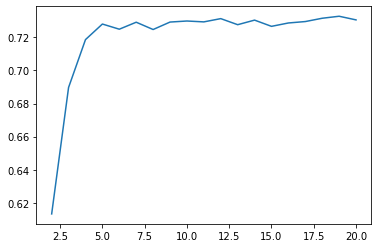

In [9]:
#fine tuning the ridge model
xlin = np.linspace(2,20,19)
ylin = np.zeros((19,1))
index = 0
for i in xlin:
    forest = lib.random_forest(n_estimators=1000,max_depth=i,min_samples_leaf=3)
    forest.fit(hou_trainset['X_train'],hou_trainset['y_train'])
    ylin[index] = forest.score(hou_testset['X_test'],hou_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.show()

In [10]:
# initiate the model
forest = lib.random_forest(n_estimators=1000,max_depth=10,min_samples_leaf=3)
# feed the data to the model
lib.eval_lr(forest,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 2.1949
R2 score is: 0.9445
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 4.5229
R2 score is: 0.7258
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [2.3162, 2.3686, 2.3844, 2.2553, 2.3187, 2.2254, 2.3203, 1.6941, 2.2933, 2.3484]
Cross-validation R2 score is 
 [0.94, 0.938, 0.9373, 0.9308, 0.9349, 0.9345, 0.9414, 0.9613, 0.9358, 0.9387]
Average RMSE is: 2.2525
Average R2 score is: 0.9393
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.3468, 2.2227, 2.84

#### Conclusion

- The model still overfits the training set
- The cross-validation gives a good performance on the training set, but not good at all on the test set.

### 2.3. Linear Regression algorithm

In [11]:
lr = lib.lr_model()
# feed the data to the model
lib.eval_lr(lr ,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 4.9385
R2 score is: 0.7191
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.4653
R2 score is: 0.5997
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.2062, 5.1552, 5.1692, 4.9445, 5.0503, 5.1059, 5.1668, 3.6847, 4.9686, 5.1903]
Cross-validation R2 score is 
 [0.697, 0.7063, 0.7052, 0.6672, 0.6912, 0.6553, 0.7094, 0.8169, 0.6987, 0.7004]
Average RMSE is: 4.9642
Average R2 score is: 0.7048
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.9772, 3.8605, 3.

### 2.4 Ridge Regression algorithm

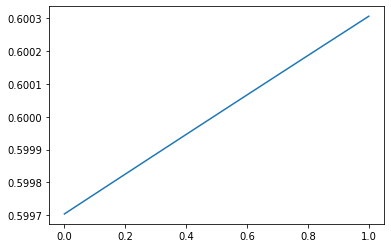

In [12]:
#fine tuning the ridge model
xlin = np.linspace(0,1,10)
ylin = np.zeros((10,1))
index = 0
for i in xlin:
    ridge = lib.ridge_model(alpha=i)
    ridge.fit(hou_trainset['X_train'],hou_trainset['y_train'])
    ylin[index] = ridge.score(hou_testset['X_test'],hou_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.show()

As we can see the ridge model performs the best with alpha = 0.1


In [13]:
ridge = lib.ridge_model(alpha=0.1)
lib.eval_lr(ridge,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 4.9385
R2 score is: 0.7191
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.4648
R2 score is: 0.5998
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.2062, 5.1552, 5.1692, 4.9445, 5.0503, 5.1059, 5.1668, 3.6847, 4.9686, 5.1903]
Cross-validation R2 score is 
 [0.697, 0.7063, 0.7052, 0.6672, 0.6912, 0.6553, 0.7094, 0.8169, 0.6987, 0.7004]
Average RMSE is: 4.9642
Average R2 score is: 0.7048
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.9768, 3.859, 3.9

### 2.5 Lasso Regression algorithm

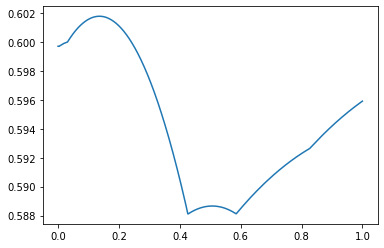

In [14]:
#fine tuning the lasso model
xlin = np.linspace(0,1,1000)
ylin = np.zeros((1000,1))
index = 0
for i in xlin:
    lasso = lib.lasso(alpha=i)
    lasso.fit(hou_trainset['X_train'],hou_trainset['y_train'])
    ylin[index] = lasso.score(hou_testset['X_test'],hou_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.show()

As we can see the lasso model performs the best with alpha = 0.001

In [15]:
lasso = lib.lasso(alpha=0.4)
lib.eval_lr(lasso,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 5.1072
R2 score is: 0.6996
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.5277
R2 score is: 0.5905
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.3584, 5.3222, 5.3464, 5.1252, 5.2238, 5.2698, 5.3617, 3.9331, 5.1316, 5.3432]
Cross-validation R2 score is 
 [0.679, 0.6869, 0.6846, 0.6424, 0.6697, 0.6328, 0.6871, 0.7914, 0.6786, 0.6825]
Average RMSE is: 5.1415
Average R2 score is: 0.6835
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.9229, 3.1524, 2.

### 2.6 SVR Linear algorithm

In [16]:
#the SVR Linear model has no hyperparameter to fine tune
svr_linear = lib.svr_linear_model()
lib.eval_lr(svr_linear,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 5.1616
R2 score is: 0.6932
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.6221
R2 score is: 0.5764
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.4635, 5.4017, 5.4082, 5.1318, 5.3194, 5.3505, 5.3938, 3.7594, 5.1879, 5.5198]
Cross-validation R2 score is 
 [0.6663, 0.6775, 0.6773, 0.6415, 0.6575, 0.6215, 0.6833, 0.8094, 0.6715, 0.6612]
Average RMSE is: 5.1936
Average R2 score is: 0.6767
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.7125, 2.9346, 3

### 2.7 SVR rbf algorithm

In [17]:
#the SVR rbf model has no hyperparameter to fine tune
svr_rbf = lib.svr_rbf_model()
lib.eval_lr(svr_rbf,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 4.9639
R2 score is: 0.7163
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 4.3176
R2 score is: 0.7502
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [4.7973, 4.8839, 4.8754, 4.5972, 4.8069, 4.8902, 4.8499, 3.8045, 4.69, 4.8673]
Cross-validation R2 score is 
 [0.7427, 0.7364, 0.7377, 0.7123, 0.7203, 0.6838, 0.744, 0.8048, 0.7315, 0.7365]
Average RMSE is: 4.7063
Average R2 score is: 0.7350
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.5593, 2.4407, 2.45

### 2.8 KNN

The best r2 score is  0.8239121895389492
The best n_neighbors is  3


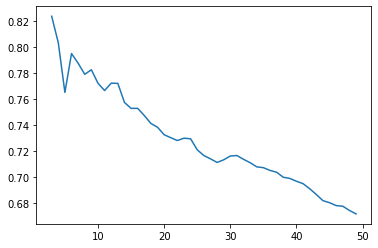

In [18]:
#Take X, y from trainset and testset 
X_train = hou_trainset['X_train']
y_train = hou_trainset['y_train']
X_test = hou_testset['X_test']
y_test = hou_testset['y_test']
n_neighors = lib.tunning_knn(X_train, y_train, X_test, y_test)

In [19]:
knn = lib.knn(n_neighors)
lib.eval_lr(knn ,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 2.7273
R2 score is: 0.9143
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 3.6248
R2 score is: 0.8239
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [2.8672, 2.8629, 2.9082, 2.8223, 2.8398, 2.8621, 2.8597, 2.2737, 2.7738, 2.8259]
Cross-validation R2 score is 
 [0.9081, 0.9094, 0.9067, 0.8916, 0.9024, 0.8917, 0.911, 0.9303, 0.9061, 0.9112]
Average RMSE is: 2.7895
Average R2 score is: 0.9068
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.5611, 3.8502, 3.

## 3. Result comparison

As we can see that the random forest algorithm performs the best on Boston Housing dataset.

<BarContainer object of 8 artists>

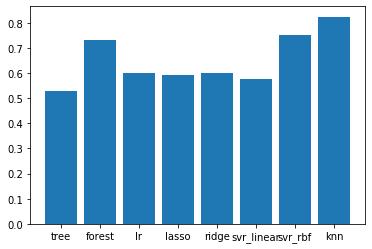

In [20]:
r2_scores=[]
model = [tree, forest, lr, lasso, ridge, svr_linear, svr_rbf, knn]
model_name= ['tree', 'forest', 'lr', 'lasso', 'ridge', 'svr_linear', 'svr_rbf', 'knn']
for i in model:
    i.fit(X_train, y_train)
    r2_scores.append(i.score(X_test, y_test))
plt.bar(model_name, r2_scores)

#  II.  PROSATE CANCER DATASET

## 1. Data Preparing

In [21]:
prostate_predic, prostate_targ = lib.data_import("prostate.data")

In [22]:
# preprocessed housing predictors, preprocessed housing targets
pre_pro_predic, pre_pro_targ = lib.data_cl(prostate_predic,prostate_targ)

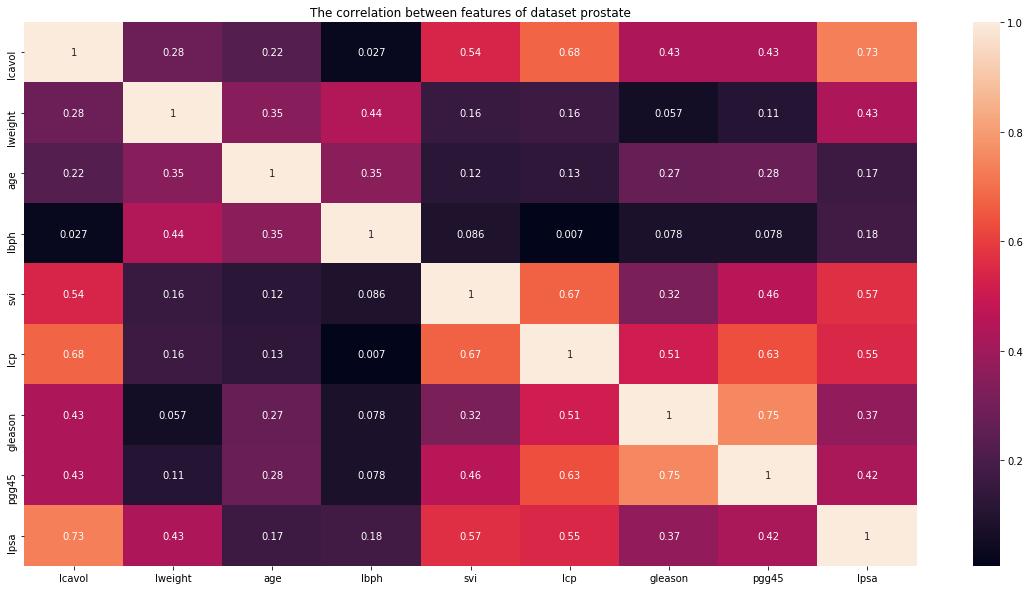

In [23]:
lib.feature_correlation('prostate.data')

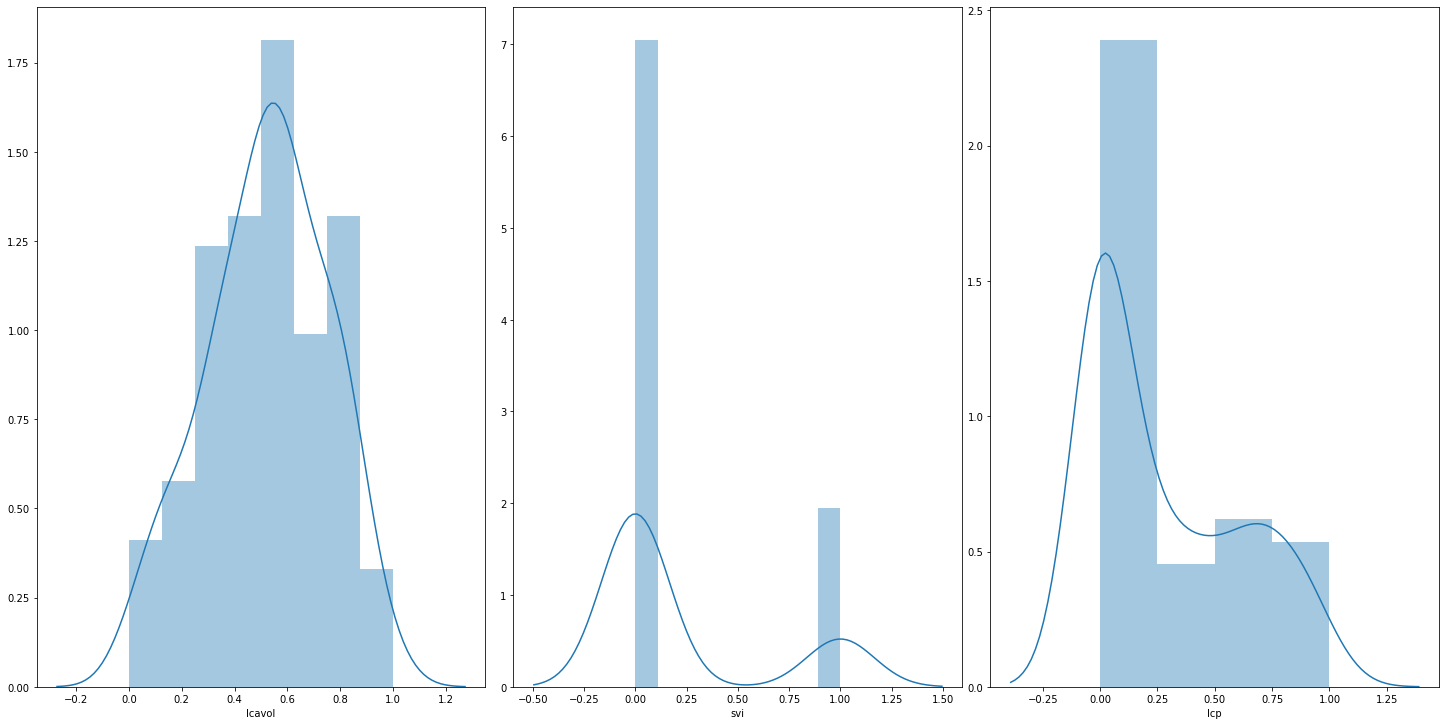

In [24]:
# house train set, house test set, house train cross validation, house test cross validation
#hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val = lib.data_split(X_new,y)
column_sels = ['lcavol', 'svi', 'lcp']
lib.dessin_distribution(pre_pro_predic, column_sels, 1, 3)
X = pre_pro_predic.loc[:,column_sels]
y = pre_pro_targ
pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val = lib.data_split(X.values, y.values, k=3)

## 2. Regression

### 2.1. Decsion Tree algorithm

We use the Decision Tree algorithm to predict the prostate.

In [25]:
# initiate the model
tree = lib.decision_tree()

In [26]:
# feed the data to the model
lib.eval_lr(tree,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.0524
R2 score is: 0.9981
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.8498
R2 score is: 0.0258
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.0575, 0.0359, 0.0674]
Cross-validation R2 score is 
 [0.9945, 0.9993, 0.9933]
Average RMSE is: 0.0536
Average R2 score is: 0.9957
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.6282, 0.9828, 1.594]
Cross-validation R2 score is 
 [-4.8656, -12.5459, -4.0988]
Average RMSE is: 1.4017
Average R2 score is: -

### 2.2. Random Forest

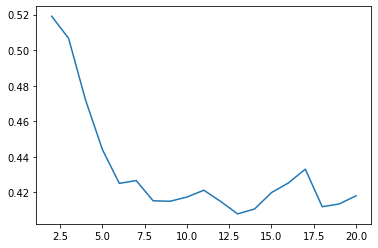

In [27]:
#fine tuning the ridge model
xlin = np.linspace(2,20,19)
ylin = np.zeros((19,1))
index = 0
for i in xlin:
    forest = lib.random_forest(n_estimators=1000,max_depth=i,min_samples_leaf=3)
    forest.fit(pro_trainset['X_train'],pro_trainset['y_train'])
    ylin[index] = forest.score(pro_testset['X_test'],pro_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.show()

In [28]:
# initiate the model
forest = lib.random_forest(n_estimators=1000,max_depth=10,min_samples_leaf=3)
# feed the data to the model
lib.eval_lr(forest,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.5731
R2 score is: 0.7755
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.6574
R2 score is: 0.4171
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.4224, 0.6051, 0.46]
Cross-validation R2 score is 
 [0.7047, 0.8103, 0.6869]
Average RMSE is: 0.4958
Average R2 score is: 0.7339
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.5009, 0.8074, 1.5281]
Cross-validation R2 score is 
 [-3.9843, -8.1432, -3.6864]
Average RMSE is: 1.2788
Average R2 score is: -5.

### 2.3. Linear Regression algorithm

In [29]:
lr = lib.lr_model()
# feed the data to the model
lib.eval_lr(lr ,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7734
R2 score is: 0.5911
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.6240
R2 score is: 0.4747
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5668, 0.7804, 0.6679]
Cross-validation R2 score is 
 [0.4682, 0.6844, 0.34]
Average RMSE is: 0.6717
Average R2 score is: 0.4975
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.2961, 0.7388, 1.2407]
Cross-validation R2 score is 
 [-2.7164, -6.6553, -2.0893]
Average RMSE is: 1.0919
Average R2 score is: -3.

### 2.4 Ridge Regression algorithm

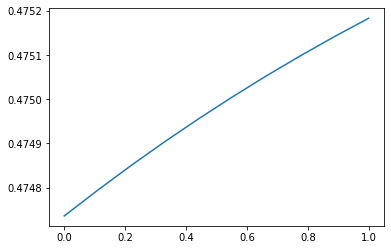

In [30]:
#fine tuning the ridge model
xlin = np.linspace(0,1,10)
ylin = np.zeros((10,1))
index = 0
for i in xlin:
    ridge = lib.ridge_model(alpha=i)
    ridge.fit(pro_trainset['X_train'],pro_trainset['y_train'])
    ylin[index] = ridge.score(pro_testset['X_test'],pro_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.show()

In [31]:
ridge = lib.ridge_model(alpha=0.1)
lib.eval_lr(ridge,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7734
R2 score is: 0.5911
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.6240
R2 score is: 0.4748
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5668, 0.7804, 0.6679]
Cross-validation R2 score is 
 [0.4682, 0.6844, 0.34]
Average RMSE is: 0.6717
Average R2 score is: 0.4975
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.2973, 0.7386, 1.2419]
Cross-validation R2 score is 
 [-2.7233, -6.652, -2.0951]
Average RMSE is: 1.0926
Average R2 score is: -3.8

### 2.5 Lasso Regression algorithm

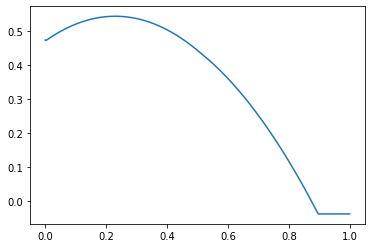

In [32]:
#fine tuning the lasso model
xlin = np.linspace(0,1,1000)
ylin = np.zeros((1000,1))
index = 0
for i in xlin:
    lasso = lib.lasso(alpha=i)
    lasso.fit(pro_trainset['X_train'],pro_trainset['y_train'])
    ylin[index] = lasso.score(pro_testset['X_test'],pro_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.show()

In [33]:
lasso = lib.lasso(alpha=0.001)
lib.eval_lr(lasso,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7734
R2 score is: 0.5911
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.6244
R2 score is: 0.4742
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5668, 0.7804, 0.6679]
Cross-validation R2 score is 
 [0.4682, 0.6844, 0.34]
Average RMSE is: 0.6717
Average R2 score is: 0.4975
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.2977, 0.7381, 1.2457]
Cross-validation R2 score is 
 [-2.726, -6.6401, -2.1139]
Average RMSE is: 1.0938
Average R2 score is: -3.8

### 2.6 SVR Linear algorithm

In [34]:
#the SVR Linear model has no hyperparameter to fine tune
svr_linear = lib.svr_linear_model()
lib.eval_lr(svr_linear,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.8029
R2 score is: 0.5594
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.5751
R2 score is: 0.5539
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5884, 0.7995, 0.6923]
Cross-validation R2 score is 
 [0.4267, 0.6688, 0.2909]
Average RMSE is: 0.6934
Average R2 score is: 0.4622
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.2604, 0.66, 1.2536]
Cross-validation R2 score is 
 [-2.5148, -5.1095, -2.1538]
Average RMSE is: 1.0580
Average R2 score is: -3.

### 2.7 SVR rbf algorithm

In [35]:
#the SVR rbf model has no hyperparameter to fine tune
svr_rbf = lib.svr_rbf_model()
lib.eval_lr(svr_rbf,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7964
R2 score is: 0.5664
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.5879
R2 score is: 0.5338
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5579, 0.8035, 0.6507]
Cross-validation R2 score is 
 [0.4846, 0.6655, 0.3735]
Average RMSE is: 0.6707
Average R2 score is: 0.5079
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.7205, 0.7331, 1.5237]
Cross-validation R2 score is 
 [-5.5492, -6.5384, -3.6589]
Average RMSE is: 1.3258
Average R2 score is: -

### 2.8 KNN

The best r2 score is  0.480500476198387
The best n_neighbors is  6


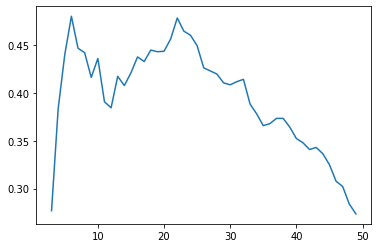

In [36]:
#Take X, y from trainset and testset 
X_train = pro_trainset['X_train']
y_train = pro_trainset['y_train']
X_test = pro_testset['X_test']
y_test = pro_testset['y_test']
n_neighors = lib.tunning_knn(X_train, y_train, X_test, y_test)

In [37]:
knn = lib.knn(n_neighors)
lib.eval_lr(knn ,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7312
R2 score is: 0.6345
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.6206
R2 score is: 0.4805
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5379, 0.7555, 0.556]
Cross-validation R2 score is 
 [0.5209, 0.7043, 0.5426]
Average RMSE is: 0.6165
Average R2 score is: 0.5893
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [1.4787, 0.8794, 1.4844]
Cross-validation R2 score is 
 [-3.8375, -9.8468, -3.4219]
Average RMSE is: 1.2808
Average R2 score is: -5

## 3. Result comparison

<BarContainer object of 8 artists>

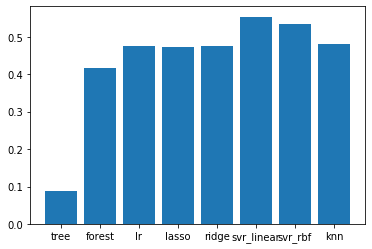

In [38]:
r2_scores=[]
model = [tree, forest, lr, lasso, ridge, svr_linear, svr_rbf, knn]
model_name= ['tree', 'forest', 'lr', 'lasso', 'ridge', 'svr_linear', 'svr_rbf', 'knn']
for i in model:
    i.fit(X_train, y_train)
    r2_scores.append(i.score(X_test, y_test))
plt.bar(model_name, r2_scores)